In [ ]:
from google.colab import files


uploaded = files.upload()


Saving export.geojson to export (3).geojson


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving export (2).geojson to export (2).geojson


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving city.geojson to city.geojson


***DISTRIBUTION OF DATASET:***

***By importing the geopandas library i can create the dataframe for my geo spatial dataset aand by importing the python library i show the plots of the river and the green space with the help of latitude and longitude***

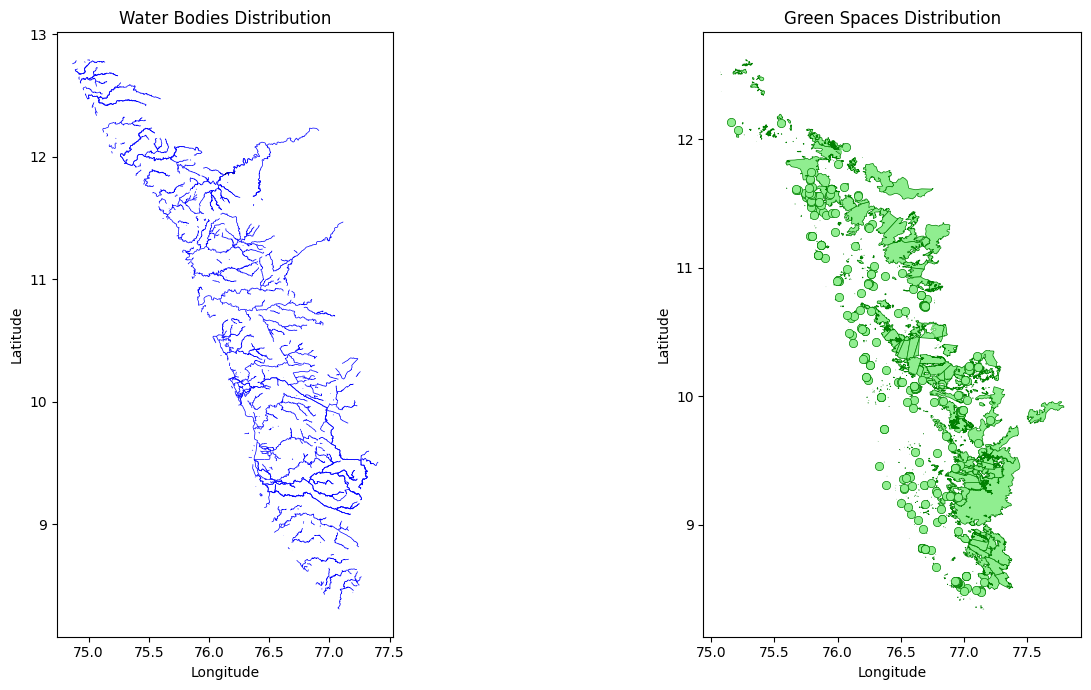

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON or shapefile data
file_path1 = 'export.geojson'  # Replace with the actual path to your GeoJSON or shapefile
gdf1 = gpd.read_file(file_path1)

file_path2 = 'export (2).geojson'  # Replace with the actual path to your GeoJSON or shapefile
gdf2 = gpd.read_file(file_path2)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first GeoDataFrame
gdf1.plot(ax=ax1, color='blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Water Bodies Distribution')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')

# Plot the second GeoDataFrame
gdf2.plot(ax=ax2, color='lightgreen', edgecolor='green', linewidth=0.5)

# Add labels and title for the second subplot
ax2.set_title('Green Spaces Distribution')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


***COMBINATION OF DATASETS:***

***Here i just merge the coordinates of the two dataset for the better visualization.They are shown in the plot graph.***

<ipython-input-56-36030d0dd508>:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


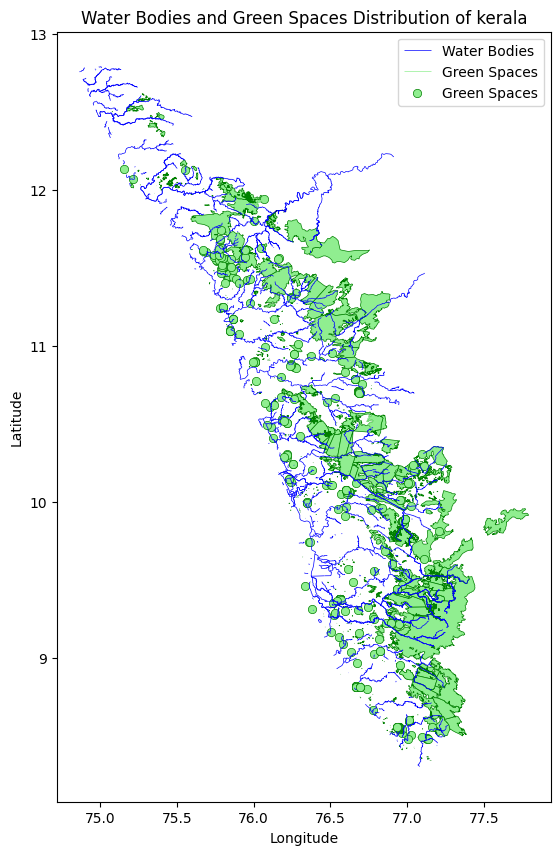

In [ ]:
!pip install geopandas
!pip install folium

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON or shapefile data
file_path1 = r'export.geojson'  # Replace with the actual path to your GeoJSON or shapefile
gdf1 = gpd.read_file(file_path1)

file_path2 = r'export (2).geojson'  # Replace with the actual path to your GeoJSON or shapefile
gdf2 = gpd.read_file(file_path2)

# Plot the data on a single map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the first GeoDataFrame
gdf1.plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5, label='Water Bodies')

# Plot the second GeoDataFrame on the same axes
gdf2.plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=0.5, label='Green Spaces')

# Add labels and title
ax.set_title('Water Bodies and Green Spaces Distribution of kerala')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add legend
ax.legend()

# Show the plot
plt.show()


**VISUALIZATION IN LIVE MAP:**

***Now the coordinates are marked by the folium marker. The folium must be install before running in the google colab with the help of this command we can download the libraries(!pip install geopandas
!pip install folium).Now using the geopandas the coordinates are shown in the live map.***

In [ ]:
!pip install geopandas
!pip install folium

import geopandas as gpd
import folium

# Load the GeoJSON or shapefile data
file_path1 = 'export.geojson'  # Give the actual path to your GeoJSON or shapefile
gdf1 = gpd.read_file(file_path1)

file_path2 = 'export (2).geojson'  # Give the actual path to your GeoJSON or shapefile
gdf2 = gpd.read_file(file_path2)

# Create a Folium map centered at the mean of all geometries
map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]
map_water_green = folium.Map(location=map_center, zoom_start=10)

# Plot the first GeoDataFrame
for _, feature in gdf1.iterrows():#This line is initiating a loop to iterate over the rows of the GeoDataFrame gdf1.
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x  #The iterrows() method is used to iterate over DataFrame rows as (index, Series) pairs.
    name = feature['name'] if 'name' in feature else 'Area'
    water_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='blue', icon='tint', prefix='fa')
    )
    water_marker.add_to(map_water_green)

# Plot the second GeoDataFrame
for _, feature in gdf2.iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Area'
    green_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='lightgreen', icon='tree', prefix='fa')  # 'tree' is the green symbol
    )
    green_marker.add_to(map_water_green)

# Display the map in the Colab notebook
map_water_green


<ipython-input-14-075023f6ff98>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]


**The dataset has too many values so i limit this to 100 value so that you can visualise it more clearly.**  

In [ ]:
!pip install geopandas
!pip install folium

import geopandas as gpd
import folium

# Load the GeoJSON or shapefile data
file_path1 = 'export.geojson'  # Replace with the actual path to your GeoJSON or shapefile
gdf1 = gpd.read_file(file_path1)

file_path2 = 'export (2).geojson'  # Replace with the actual path to your GeoJSON or shapefile
gdf2 = gpd.read_file(file_path2)

# Create a Folium map centered at the mean of all geometries
map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]
map_water_green = folium.Map(location=map_center, zoom_start=10)

# Plot the first 100 rows of the first GeoDataFrame
for _, feature in gdf1.head(100).iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Area'
    water_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='blue', icon='tint', prefix='fa')
    )
    water_marker.add_to(map_water_green)

# Plot the first 100 rows of the second GeoDataFrame
for _, feature in gdf2.head(100).iterrows():
    lat, lon = feature.geometry.centroid.y, feature.geometry.centroid.x
    name = feature['name'] if 'name' in feature else 'Area'
    green_marker = folium.Marker(
        [lat, lon],
        popup=name,
        icon=folium.Icon(color='lightgreen', icon='tree', prefix='fa')  # 'tree' is the green symbol
    )
    green_marker.add_to(map_water_green)

# Display the map in the Colab notebook
map_water_green


<ipython-input-15-4dcc3c33ce0e>:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf1.geometry.centroid.y.mean(), gdf1.geometry.centroid.x.mean()]


In [ ]:
import geopandas as gpd

# Load the GeoJSON data
file_path = 'export.geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Get the column names
column_names = gdf.columns

# Print the column names
print("Column Names:", column_names)

Column Names: Index(['id', '@id', 'access', 'alt_name', 'area', 'bicycle', 'boat', 'bridge',
       'destination', 'fishing', 'foot', 'horse', 'intermittent', 'layer',
       'level', 'lock', 'maxspeed', 'motor_vehicle', 'name', 'name:en',
       'name:hi', 'name:kn', 'name:ml', 'name:ta', 'name:te', 'name:uk',
       'natural', 'note', 'route', 'seasonal', 'source', 'source:name:uk',
       'tidal', 'tunnel', 'type', 'usage', 'water', 'waterway',
       'waterway:llid', 'width', 'wikidata', '@relations', 'wikipedia',
       'geometry'],
      dtype='object')


***Now this code shows the area of distributation of the 'Water bodies' and 'Green space' in kerala***

Column Names: Index(['id', '@id', 'access', 'alt_name', 'area', 'bicycle', 'boat', 'bridge',
       'destination', 'fishing', 'foot', 'horse', 'intermittent', 'layer',
       'level', 'lock', 'maxspeed', 'motor_vehicle', 'name', 'name:en',
       'name:hi', 'name:kn', 'name:ml', 'name:ta', 'name:te', 'name:uk',
       'natural', 'note', 'route', 'seasonal', 'source', 'source:name:uk',
       'tidal', 'tunnel', 'type', 'usage', 'water', 'waterway',
       'waterway:llid', 'width', 'wikidata', '@relations', 'wikipedia',
       'geometry'],
      dtype='object')


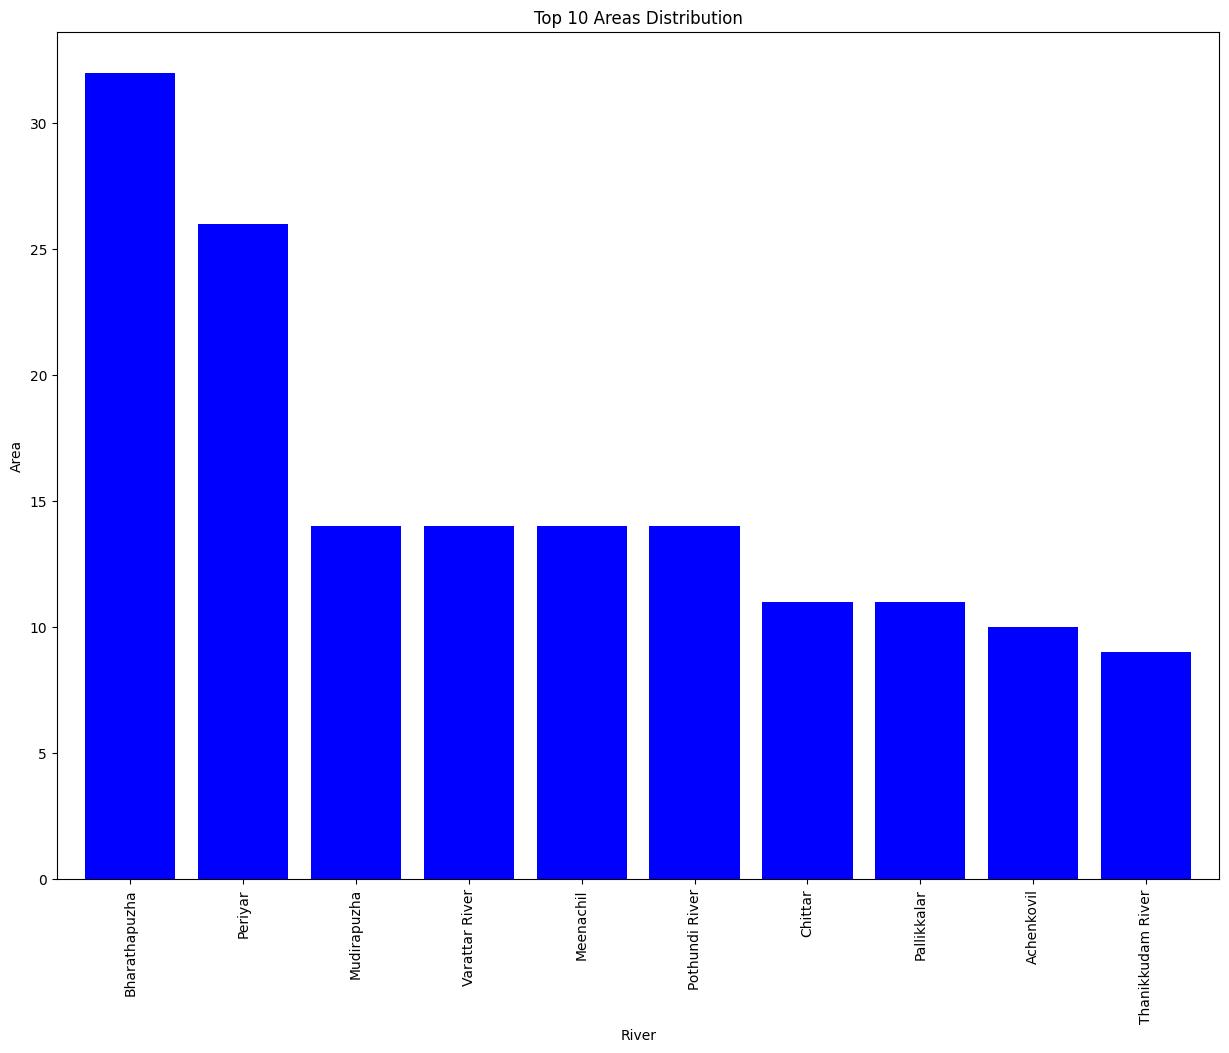

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
file_path = 'export.geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for areas
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the different areas
# Replace 'name' with the correct column name if needed
area_column_name = 'name'

# Get counts for each area
area_counts = gdf[area_column_name].value_counts()

# Select only the top 10 values
top_10_areas = area_counts.head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(15, 11))

top_10_areas.plot(kind='bar', color='blue', width=0.8, ax=ax)

ax.set_xlabel('River')
ax.set_ylabel('Area')
ax.set_title('Top 10 Areas Distribution')

plt.show()


In [ ]:
import geopandas as gpd

# Load the GeoJSON data
file_path = 'export (2).geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Get the column names
column_names = gdf.columns

# Print the column names
print("Column Names:", column_names)


Column Names: Index(['id', '@id', 'boundary', 'crop', 'description', 'fixme', 'landuse',
       'leaf_cycle', 'leaf_type', 'leisure', 'managed', 'name', 'name:en',
       'name:kn', 'name:ml', 'name:ta', 'natural', 'operator', 'place',
       'protect_class', 'source', '@relations', 'species', 'survey:date',
       'type', 'wikidata', 'geometry'],
      dtype='object')


Column Names: Index(['id', '@id', 'boundary', 'crop', 'description', 'fixme', 'landuse',
       'leaf_cycle', 'leaf_type', 'leisure', 'managed', 'name', 'name:en',
       'name:kn', 'name:ml', 'name:ta', 'natural', 'operator', 'place',
       'protect_class', 'source', '@relations', 'species', 'survey:date',
       'type', 'wikidata', 'geometry'],
      dtype='object')


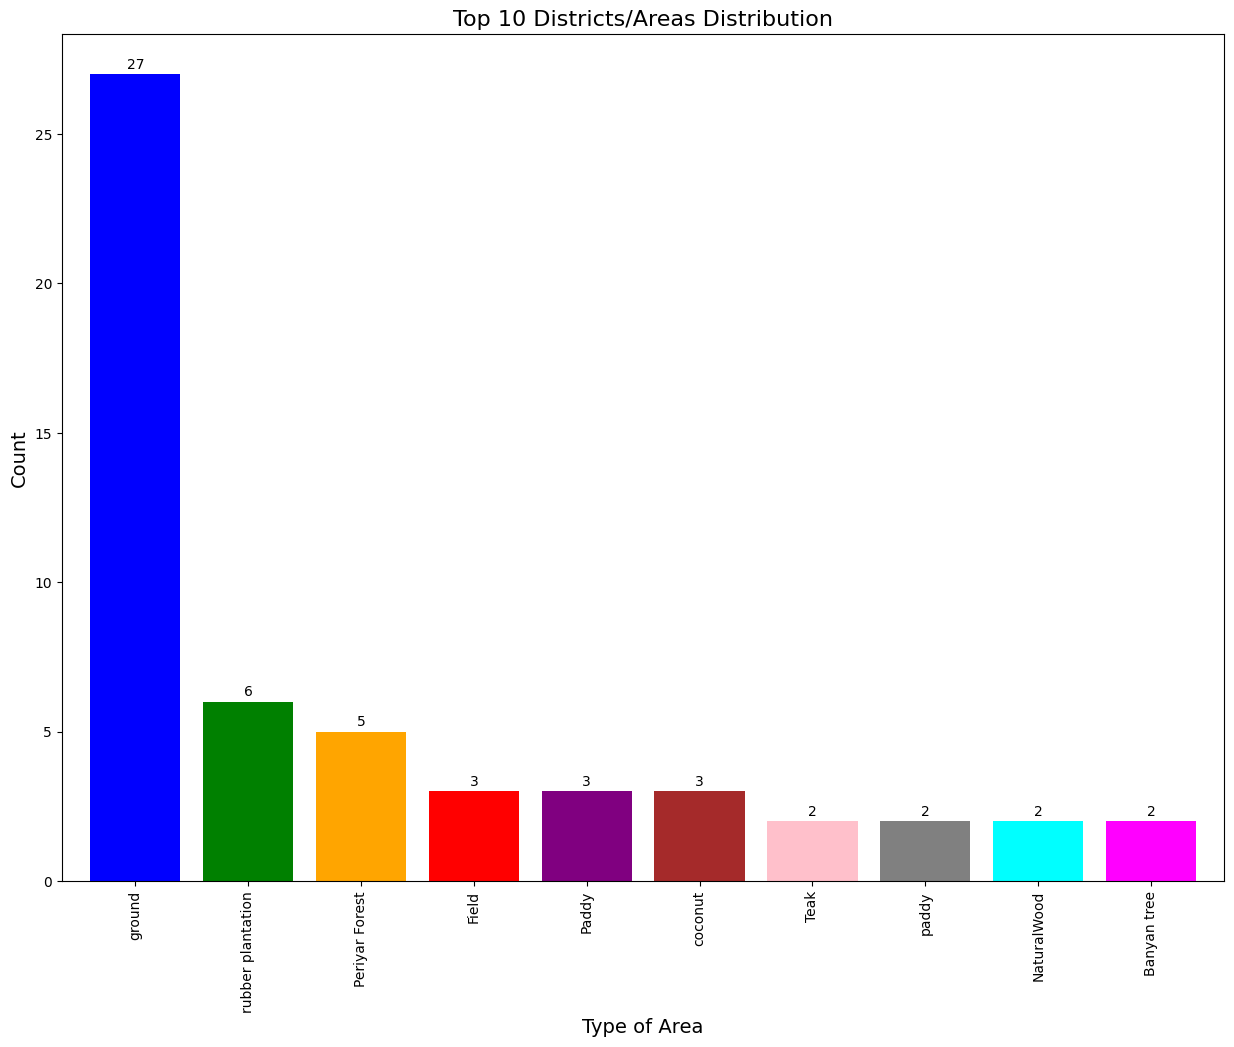

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON data
file_path = 'export (2).geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for areas
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the different areas
# Replace 'name' with the correct column name if needed
area_column_name = 'name'

# Get counts for each area
area_counts = gdf[area_column_name].value_counts()

# Select only the top 10 values
top_10_areas = area_counts.head(10)

# Define different colors for each bar
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Create a bar chart with different colors
fig, ax = plt.subplots(figsize=(15, 11))

bars = top_10_areas.plot(kind='bar', color=colors, width=0.8, ax=ax)

# Annotate each bar with its count value
for bar, count in zip(bars.patches, top_10_areas):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Customize labels and title
ax.set_xlabel('Type of Area', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Top 10 Districts/Areas Distribution', fontsize=16)

plt.show()


In [ ]:
import geopandas as gpd

# Load the GeoJSON data
file_path = 'export.geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for city information
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the city
city_column_name = 'destination'  # Replace with the correct column name

# Check unique values in the city column
unique_cities = gdf[city_column_name].unique()

# Print the unique cities
print("Unique Cities:", unique_cities)


Column Names: Index(['id', '@id', 'access', 'alt_name', 'area', 'bicycle', 'boat', 'bridge',
       'destination', 'fishing', 'foot', 'horse', 'intermittent', 'layer',
       'level', 'lock', 'maxspeed', 'motor_vehicle', 'name', 'name:en',
       'name:hi', 'name:kn', 'name:ml', 'name:ta', 'name:te', 'name:uk',
       'natural', 'note', 'route', 'seasonal', 'source', 'source:name:uk',
       'tidal', 'tunnel', 'type', 'usage', 'water', 'waterway',
       'waterway:llid', 'width', 'wikidata', '@relations', 'wikipedia',
       'geometry'],
      dtype='object')
Unique Cities: [None 'Vembanad Lake' 'Pamba River']


In [ ]:
import geopandas as gpd

# Load the GeoJSON data
file_path = 'export (2).geojson'  # Replace with the actual path to your GeoJSON file
gdf = gpd.read_file(file_path)

# Print column names to identify the correct column for city information
print("Column Names:", gdf.columns)

# Assuming your GeoDataFrame has a column indicating the city
city_column_name = 'name'  # Replace with the correct column name

# Check unique values in the city column
unique_cities = gdf[city_column_name].unique()

# Print the unique cities
print("Unique Cities:", unique_cities)


Column Names: Index(['id', '@id', 'boundary', 'crop', 'description', 'fixme', 'landuse',
       'leaf_cycle', 'leaf_type', 'leisure', 'managed', 'name', 'name:en',
       'name:kn', 'name:ml', 'name:ta', 'natural', 'operator', 'place',
       'protect_class', 'source', '@relations', 'species', 'survey:date',
       'type', 'wikidata', 'geometry'],
      dtype='object')
Unique Cities: ['Megamalai WLS' None 'Neyyar WLS' 'Kuthiraan Hills' 'ground'
 'Natural Wood' 'Vagamon Pine Forest' 'nellippara thod'
 'Melur Slope Reserve Forest' 'Mudumalai National Park/Tiger Reserve'
 'Anamalai' 'Vallikkattu Kavu Sacred grove' 'Poyilkavu sacred grove'
 'Thechyot Bhagavathy Kavu' 'Madayikkavu' 'Sarppakavu' 'Paithrukodyanam'
 'Coconut Trees' 'Pancharakkadu' 'Lanka' 'Kundettukonam Kavu'
 'natural road' "St Sebastian's HS Kanthippara" 'Sanka Woods'
 'banyan tree' '1' 'Matha woodworks' 'Thattekad Bird WLS'
 'Mixed Wooded area' 'Boundary of Thuruvanam SC Colony' 'coconut'
 'orchard' 'Field' 'NatuarlWood' 'N

In [ ]:
print(city.columns)


Index(['id', '@id', 'AND_a_c', '_District_', 'alt_name', 'alt_name:pt',
       'alt_name:uk', 'capital', 'is_capital', 'is_in:country', 'is_in:state',
       'name', 'name:ar', 'name:az-Arab', 'name:azb', 'name:bn', 'name:cs',
       'name:el', 'name:en', 'name:eo', 'name:es', 'name:fa', 'name:he',
       'name:hi', 'name:ja', 'name:kn', 'name:ks', 'name:lt', 'name:mg',
       'name:ml', 'name:mr', 'name:ne', 'name:new', 'name:pa', 'name:pnb',
       'name:ps', 'name:pt', 'name:ru', 'name:sa', 'name:sat', 'name:si',
       'name:sr', 'name:ta', 'name:te', 'name:tn', 'name:tr', 'name:uk',
       'name:ur', 'name:vi', 'name:war', 'name:zh', 'note', 'old_name',
       'place', 'place:cca', 'population', 'postal_code', 'source',
       'source:population', 'state', 'website', 'wikidata', 'wikipedia',
       'geometry'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1713920 entries, 0 to 1713919
Columns: 196 entries, id_x_x to geometry_y_y
dtypes: geometry(4), object(192)
memory usage: 2.5+ GB
None


<ipython-input-3-736d301da9b3>:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


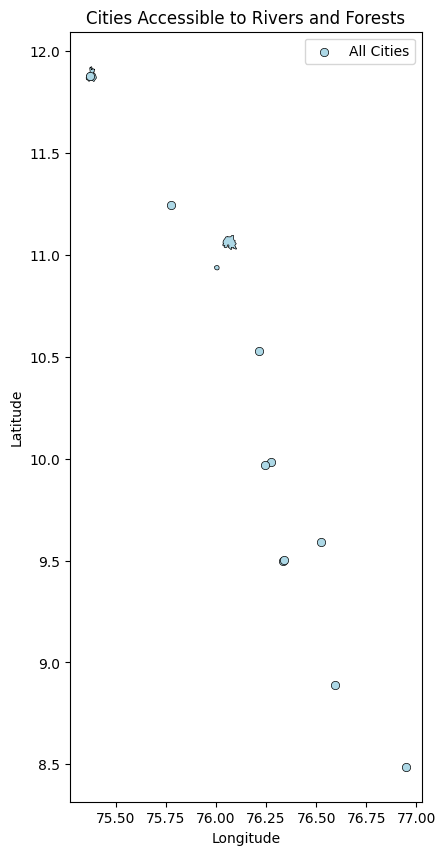

In [ ]:
# Print information about accessible_cities GeoDataFrame
print(accessible_cities.info())

# Plot the result on a map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot all cities
gdf_cities.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.5, label='All Cities')

# Plot accessible cities (only plotting their geometry)
if not accessible_cities.empty and 'geometry' in accessible_cities.columns:
    accessible_cities['geometry'].plot(ax=ax, color='lightgreen', edgecolor='green', linewidth=0.5, label='Accessible Cities')

ax.set_title('Cities Accessible to Rivers and Forests')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

# Show the plot
plt.show()


**CONCLUSION:**

***Its seems like the bharathapuzha and periyar river has the biggest area.In kerala there is more ground area. With this the ground area which is close to the bharathapuzha and periyar river is easy accessibile (cities:Aluva,Ernakulam,Kottayam,Alappuzha (Alleppey),Kochi,Perumbavoor)to inform urban planning and conservation efforts.. I also found some unique cities and river in this project like 'Vembanad Lake' 'Pamba River',etc...***